# 4. přednáška - Grafika

## Příklad 1
V tabulce jsou uvedeny průměrné měsíční teploty v Brně v roce 2016 a dlouholeté minimální a maximální měsíční průměry

 | | I | II | III | IV | V | VI | VII | VIII | IX | X | XI | XII |
 |:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
 | *průměrné* | -2,1 | -0,3 | 4,4 | 9,5 | 14,3 | 17,5 | 19,3 | 19,1 | 14,8 | 9,3 | 4,0 | -0,4 |
 | *minimální* | -10,8 | -8,4 | -0,6 | 6,4 | 10,6 | 14,5 | 16,3 | 15,1 | 11,3 | 5,6 | 0,1 | -5,1 |
 | *maximální* | 3,0 | 4,9 | 8,8 | 14,0 | 17,2 | 20,9 | 22,9 | 24,0 | 18,1 | 12,5 | 7,5 | 2,8 |

Zdroj: ČHMÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **teploty.mat**.
    
</div>

In [2]:
cd("D:\Dokumenty\vyuka\2425\M4130\jupyter")

In [3]:
load teploty

In [ ]:
mesice = char('Leden','Únor','Březen','Duben','Květen','Červen','Červenec','Srpen','Září','Říjen','Listopad','Prosinec');

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit průběh teplot v čase?
    
</div>

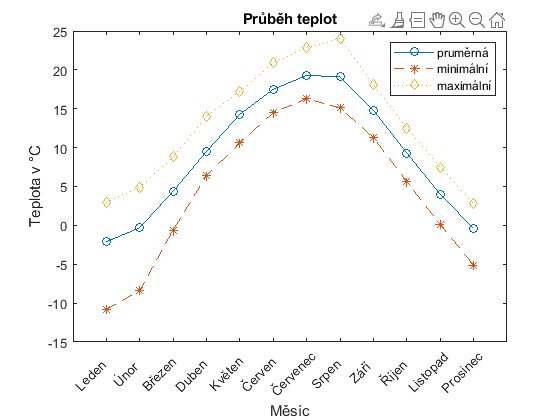

In [21]:
% kod pro obrazek

figure("Visible","on")
plot(prumerne_teploty, 'o-')
hold on
plot(min_teploty, '*--')
plot(max_teploty, 'd:')

legend('pruměrná', 'minimální', 'maximální')
ax = axis;
ax(2) = 13;
axis(ax);
set(gca, 'XTick', 1:12)
set(gca, 'XTickLabel', mesice)
set(gca, 'XTickLabelRotation', 45)

xlabel('Měsíc')
ylabel('Teplota v °C')
title('Průběh teplot')



<div class="alert alert-block alert-warning"> 

Příkaz **set** patří mezi složitější a univerzálnější příkazy. Je užitečné ho znát, ale není nutné pro zápočet.
    
</div>

<div class="alert alert-block alert-success"> 

**2.** Jak exportovat obrázky do PDF, abychom je mohli vložit do této prezentace?
    
</div>

<div class="alert alert-block alert-info"> 

Export obrázku lze přímo z prostředí Jupyter kliknutím na ikonu "Save As" vpravo nahoře. Exportovat příkazem je výhodné, pokud chceme exportovat více obrázků.
    
</div>

In [ ]:
h = gcf;
set(h, 'PaperOrientation', 'landscape')
set(h, 'PaperUnits', 'normalized')
set(h, 'PaperPosition', [0 0 1 1])
print(h, 'prubeh_teplot.pdf', '-dpdf')

<div class="alert alert-block alert-success"> 

**3.** Jak vykreslit průběh teplot v čase s odchylkami od extrémních hodnot?
    
</div>

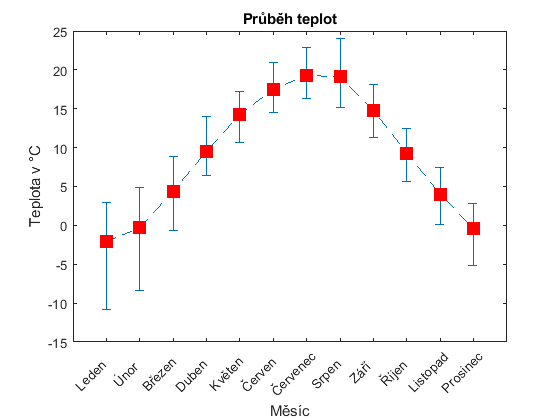

In [9]:
% kod pro obrázek

errorbar(1:12, prumerne_teploty, prumerne_teploty - min_teploty, max_teploty - prumerne_teploty, ...
    'Marker', 'square', 'MarkerSize', 12, 'MarkerEdgeColor', [1 0 0],...
    'MarkerFaceColor', [1 0 0], 'LineStyle', '--')
ax = axis;
ax(2) = 13;
axis(ax);
title('Průběh teplot')
xlabel('Měsíc')
ylabel('Teplota v °C')
set(gca, 'XTick', 1:12)
set(gca, 'Xticklabel', mesice)
set(gca, 'XtickLabelRotation', 45)


## Příklad 2
V tabulce jsou uvedeny počty obyvatel v Jihomoravském kraji ve věku 15 a více let podle nejvyššího ukončeného vzdělání.
|rok | celkem | základní | vyučení | střední | vysokoškolské | bez vzdělání|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1980 | 877 755 | 396 337 | 276 699 | 148 070 | 51 151 | 1 565|
| 1991 | 904 177 | 302 604 | 312 072 | 205 564 | 75 359 | 2 227|
| 2001 | 953 502 | 222 262 | 353 596 | 267 556 | 98 154 | 3 269|
| 2011 | 1 003 708 | 176 419 | 324 371 | 307 714 | 143 968 | 4 283|

Zdroj: ČSÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **obyvatelstvoJM.csv**.
    
</div>

In [24]:
T = readtable('obyvatelstvoJM.csv', 'headerlines', 0, ...
    'readvariablenames', 1, 'Delimiter', ';');
M = table2array(T);  % prevod promene table do matice

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit sloupcový graf absolutních hodnot?
    
</div>

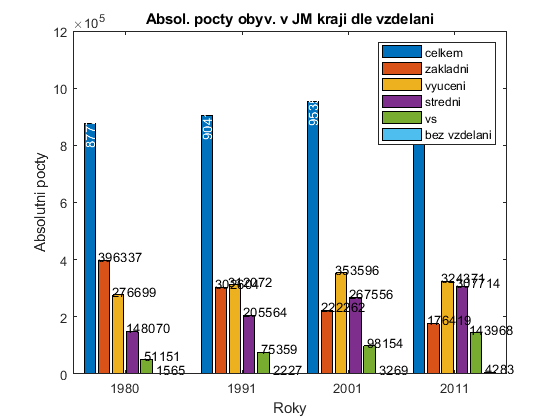

In [32]:
% kod k obrazku

roky = M(:, 1);
figure("Visible","on")
bar(roky, M(:, 2:end))

legend('celkem', 'zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani')
title('Absol. pocty obyv. v JM kraji dle vzdelani')
xlabel('Roky')
ylabel('Absolutni pocty')

text(roky - 3.4, M(:, 2) - 100000, num2str(M(:, 2)), 'Color', 'white', 'Rotation', 90)
text(roky - 2.6, M(:, 3) + 15000, num2str(M(:, 3)))
text(roky - 1.3, M(:, 4) + 15000, num2str(M(:, 4)))
text(roky + 0.1, M(:, 5) + 15000, num2str(M(:, 5)))
text(roky + 1.4, M(:, 6) + 15000, num2str(M(:, 6)))
text(roky + 2.9, M(:, 7) + 15000, num2str(M(:, 7)))


<div class="alert alert-block alert-success"> 

**2.** Jak vykreslit sloupcový graf relativních hodnot?
    
</div>

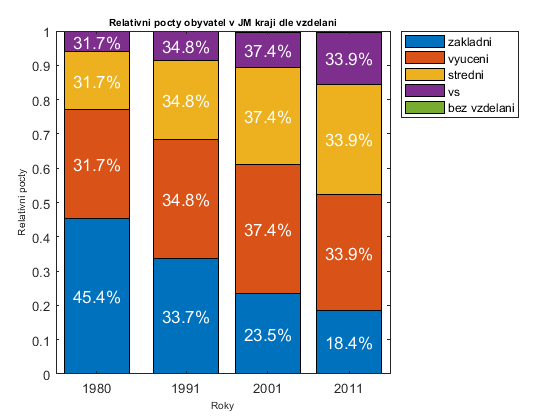

In [38]:
% kod k obrazku

relativni = M(:, 3:end)./(sum(M(:, 3:end), 2)*ones(1, 5));

figure("Visible","on")
bar(roky, relativni, 'stacked')
ax = axis;
ax(2) = 2016;
ax(1) = 1975;
axis(ax)
legend('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani', ...
    'Location', 'BestOutside')
title('Relativni pocty obyvatel v JM kraji dle vzdelani',...
    'FontUnits', 'normalized', 'FontSize', 0.03)
xlabel('Roky','FontUnits', 'normalized', 'FontSize', 0.03)
ylabel('Relativni pocty', 'FontUnits', 'normalized', 'FontSize', 0.03)

procenta = 100*round(relativni(:, 1:end-1), 3);
pozice = cumsum(relativni(:, 1:end-1), 2);
text(roky, pozice(:, 1)/2, [num2str(procenta(:, 1)), ['%';'%';'%';'%']],...
    'FontUnits', 'normalized', 'FontSize', 0.05, 'Color', 'white', ...
    'HorizontalAlignment', 'center')
text(roky, pozice(:, 2) - procenta(:,2)/200, [num2str(procenta(:, 2)), ['%';'%';'%';'%']],...
    'FontUnits', 'normalized', 'FontSize', 0.05, 'Color', 'white', ...
    'HorizontalAlignment', 'center')
text(roky, pozice(:, 3) - procenta(:,3)/200, [num2str(procenta(:, 2)), ['%';'%';'%';'%']],...
    'FontUnits', 'normalized', 'FontSize', 0.05, 'Color', 'white', ...
    'HorizontalAlignment', 'center')
text(roky, pozice(:, 4) - procenta(:,4)/200, [num2str(procenta(:, 2)), ['%';'%';'%';'%']],...
    'FontUnits', 'normalized', 'FontSize', 0.05, 'Color', 'white', ...
    'HorizontalAlignment', 'center')
                

<div class="alert alert-block alert-warning"> 

Oba předchozí obrázky jsme vykreslili příkazem **bar**. Všimněte si, jak výstup tohoto příkazu závisí na parametrech.
    
</div>

<div class="alert alert-block alert-success"> 

**3.** Jak vykreslit koláč s relativními hodnotami?
    
</div>

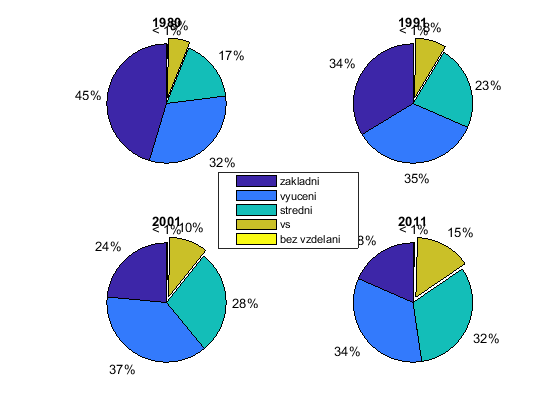

In [41]:
% kod k obrazku

figure("Visible","on")
for k = 1:4
    subplot(2, 2, k)
    pie(M(k, 3:end), [0 0 0 1 0])
    title(num2str(M(k, 1)))
end
legend('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani', ...
    'Position', [0.39, 0.45, 0.25, 0.1])


<div class="alert alert-block alert-warning"> 

Při tvorbě obrázku jsme použili cyklus **for**. Sledujte také, jak funguje příkaz **subplot**.
    
</div>

## Příklad 3
V tabulce jsou uvedeny hodnoty skóre klientů, kterým poskytujeme úvěr. Klienti jsou rozděleni podle jejich předchozí platební morálky na špatné (20 klientů) a na dobré (50 klientů).

| | | | | | | |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **špatní** | 2,7264 | 2,6943 | 2,3941 | 2,6316 | 1,2909 | $\dots$ |
| **dobří** | 7,2547 | 11,5019 | 6,9786 | 6,0989 | 5,8099 | $\dots$ |


Zdroj: ČSÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **skore.mat**.
    
</div>

In [43]:
load skore

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit histogramy hodnot skóre?
    
</div>

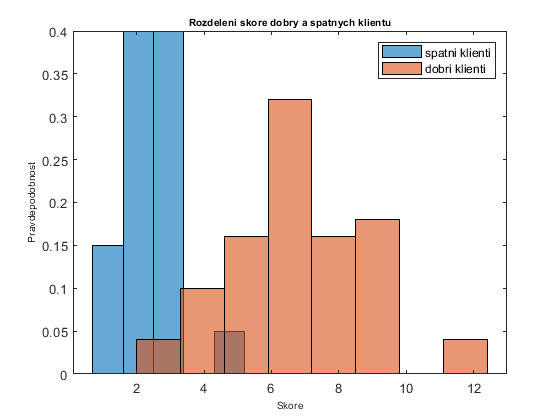

In [50]:
% kod k obrazku

figure("Visible","on")
h1 = histogram(spatni, 5, 'Normalization', 'probability');
hold on

h2 = histogram(dobri, 8, 'Normalization', 'probability');
hold on

legend([h1, h2], {'spatni klienti', 'dobri klienti'})
xlabel('Skore', 'FontUnits', 'Normalized', 'FontSize', 0.03)
ylabel('Pravdepodobnost', 'FontUnits', 'Normalized', 'FontSize', 0.03)
title('Rozdeleni skore dobry a spatnych klientu', 'FontUnits', 'Normalized', 'FontSize', 0.03)


<div class="alert alert-block alert-success"> 

**2.** Jak přikreslit odhady hustot rozdělení skóre?
    
</div>

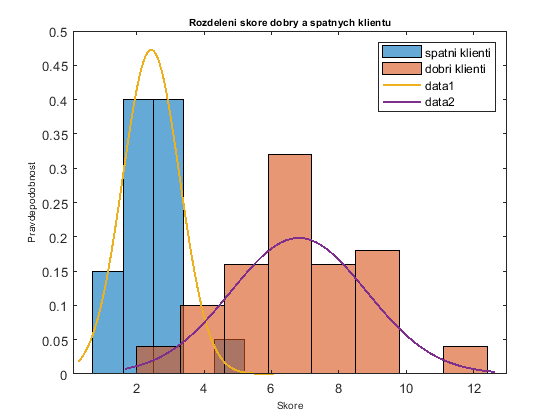

In [51]:
% kod k obrazku

% spatni
y = linspace(min(spatni) - 1, max(spatni) + 1);
mu = mean(spatni);
sigma = std(spatni);
f = normpdf(y, mu, sigma);
plot(y, f, 'LineWidth', 1.5)

% dobri
mu = mean(dobri);
sigma = std(dobri);
y = linspace(min(dobri) - 1, max(dobri) + 1);
f = normpdf(y, mu, sigma);
plot(y, f, 'LineWidth', 1.5)


<div class="alert alert-block alert-warning"> 

Při tvorbě histogramu používáme příkaz **histogram**. Také jsme si vyzkoušeli kreslení více grafů do jednoho.
    
</div>

## Příklad 4
V tabulce jsou uvedeny průměrné hodnoty teploty, srážek a ozónu naměřené na daném místě v daný čas. Chceme modelovat závislost množství ozónu na teplotě a množství srážek.

| | | | | | | |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **teplota** | 11,09 | 10,96 | 11,81 | 9,52 | 12,07 | $\dots$ |
| **srážky** | 2,55 | 2,19 | 2,36 | 1,51 | 2,59 | $\dots$ |
| **ozón** | 343,29 | 348.35 | 352,90 | 336,27 | 355,07 | $\dots$ |


<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **meteo.mat**.
    
</div>

In [57]:
load meteo

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit jednotlivé proměnné proti sobě a zjistit rozdělení pravděpodobnosti jejích hodnot?
    
</div>

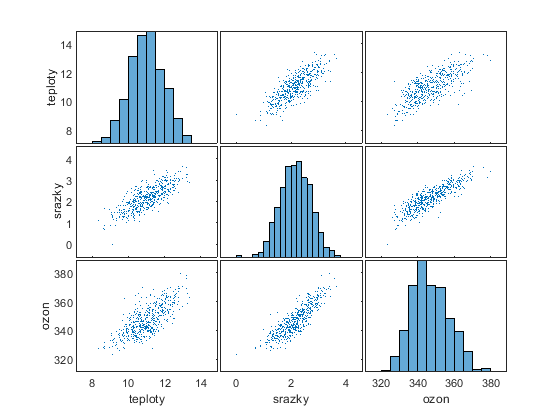

In [63]:
% kod k obrazku

[S, AX] = plotmatrix([teploty, srazky, ozon]);
ylabel(AX(1, 1), 'teploty')
ylabel(AX(2, 1), 'srazky')
ylabel(AX(3, 1), 'ozon')
xlabel(AX(3, 1), 'teploty')
xlabel(AX(3, 2), 'srazky')
xlabel(AX(3, 3), 'ozon')

<div class="alert alert-block alert-success"> 

**2.** Jak vykreslit ozón v závislosti na teplotě a srážkách (pouze naměřená data)?
    
</div>

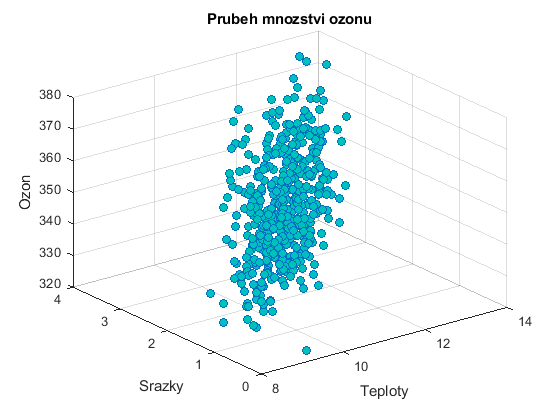

In [64]:
% kod k obrazku

figure("Visible","on")
scatter3(teploty, srazky, ozon, 'MarkerFaceColor',[0 .75 .75])
xlabel('Teploty')
ylabel('Srazky')
zlabel('Ozon')
title('Prubeh mnozstvi ozonu')


<div class="alert alert-block alert-success"> 

**3.** Užitím metod regresní analýzy nám vyšla závislost daná rovnicí
 $$
 ozon = 2 \, teplota + 3 \, srazky^2 + 310.
 $$
 Jak přikreslit do obrázku plochu danou touto rovnicí?
    
</div>

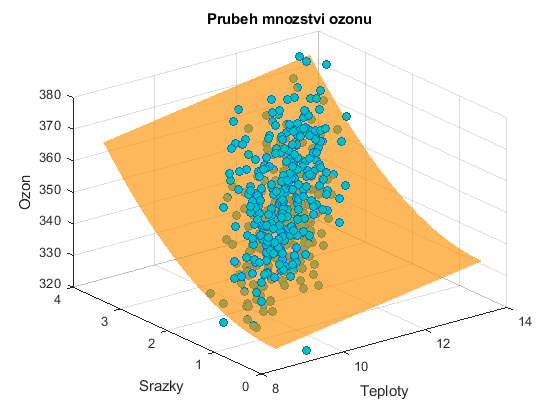

In [66]:
% kod k obrazku

x = linspace(min(teploty), max(teploty), 20);
y = linspace(min(srazky), max(srazky), 20);
[X, Y] = meshgrid(x, y);
Z = 2*X + 3*Y.^2 +310;
hold on
mesh(X, Y, Z, 'FaceColor', [1, 0.56, 0], 'MeshStyle', 'none', ...
    'FaceAlpha', 0.4)


<div class="alert alert-block alert-warning"> 

Při kreslení ve 3-D je třeba dobře definovat síť bodů, ve kterých se vykresluje. Slouží k tomu příkaz **meshgrid**.
    
</div>

## Příklad 5 
Nakreslete značku STOP.

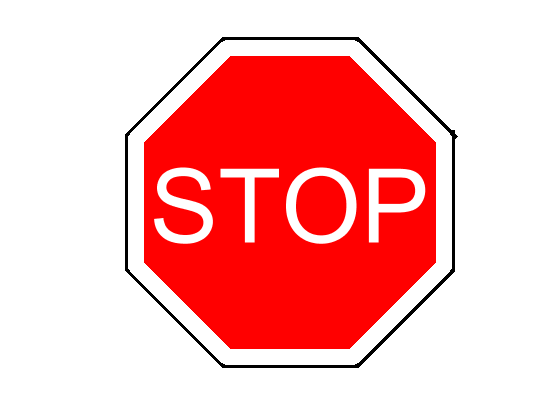

In [56]:
% kod k obrazku

t = (1/16:1/8:1)'*2*pi;
x = cos(t);
y = sin(t);

figure("Visible","on")
fill(x, y, 'r', 'EdgeColor', 'black', 'LineWidth', 10)
axis square
axis off

hold on
xx = [x; x(1:2)];
yy = [y; y(1:2)];
plot(fix(xx*30)/30, fix(yy*30)/30, 'Color', 'white', 'LineWidth', 12)
text(0, 0, 'STOP', 'FontUnits', 'normalized', 'FontSize', 0.3,...
    'HorizontalAlignment', 'center', 'Color', 'white')


<div class="alert alert-block alert-warning"> 

Při tvorbě obrázku jsme využili polárních souřadnic a také příkaz **fill**.
    
</div>

## Příklad 6

Vytvořte funkci **hodiny**, která bude mít na vstupu dvě čísla; počet hodin a počet minut; a která vykreslí analogové hodiny, které ukážou kolik je hodin. Např. při zadání **hodiny(16, 14)** se vykreslí následující obrázek.


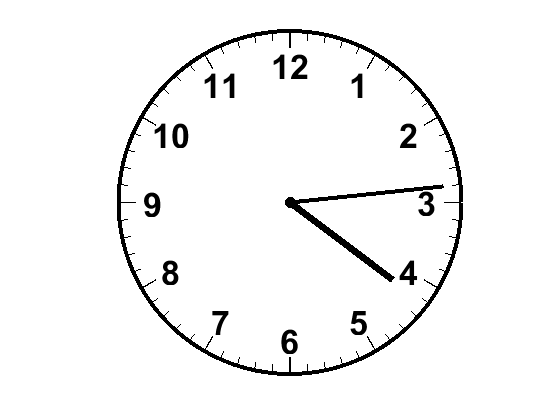

In [2]:
% kod k obrazku

hold off
t = linspace(0, 2*pi);
x = cos(t);
y = sin(t);
plot(x, y, 'k', 'LineWidth', 3)
axis square
axis off
hold on

for k = 1:12
    t = pi/2 - k*2*pi/12;
    x = [0.9 1]*cos(t);
    y = [0.9 1]*sin(t);
    plot(x, y, 'k', 'LineWidth', 1)
    text(0.8*cos(t), 0.8*sin(t), num2str(k), 'FontUnits', 'normalized',...
        'FontSize', 0.1, 'FontWeight', 'bold', 'HorizontalAlignment', 'center')
end

for k = 1:60
    t = pi/2 - k*2*pi/60;
    x = [0.95 1]*cos(t);
    y = [0.95 1]*sin(t);
    plot(x, y, 'k', 'LineWidth', 0.5)
end

hod = 16;
mn = 14;
t_v = pi/2 - mn*2*pi/60;
t_m = pi/2 - hod*2*pi/12 - mn*2*pi/(60*12);
x_v = [0 0.9]*cos(t_v);
y_v = [0 0.9]*sin(t_v);
x_m = [0 0.75]*cos(t_m);
y_m = [0 0.75]*sin(t_m);

plot(x_v, y_v, 'k', 'LineWidth', 3);
plot(x_m, y_m, 'k', 'LineWidth', 5);
plot(0, 0, 'ko', 'MarkerSize', 8, 'MarkerFaceColor', 'black');



<div class="alert alert-block alert-warning"> 

Při tvorbě obrázku jsme opět využili polárních souřadnic. Funkce se v Matlabu deklaruje příkazem **function**.
    
</div>